# Comparing Morning and Afternoon GPAs at UW Madison since 2006

This notebook performs a SQL query on the UW Madison database and does a hypothesis test comparing morning and afternoon class GPAs.

H0 = There is no difference between GPAs of morning and afternoon classes.

HA = There is a difference between GPAs of morning and afternoon classes.

---

## Import necessary Python libraries and modules

In [2]:
from sqlalchemy import create_engine
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bootstrap import bootstrap

## Query the database and create dataframes of morning and afternoon classes

In [3]:
engine = create_engine('postgresql:///uw_madison')

In [4]:
morning_df = pd.read_sql('SELECT * FROM morning_classes_gpas;', engine)
morning_df.describe()

,section_number,section_gpa
count,123451.000000,123451.000000
mean,7.673555,3.373092
std,13.850752,0.366443
min,1.000000,0.000000
25%,1.000000,3.117647
50%,2.000000,3.395833
75%,8.000000,3.666667
max,234.000000,3.996503


In [5]:
afternoon_df = pd.read_sql('SELECT * FROM afternoon_classes_gpas;', engine)
afternoon_df.describe()

,section_number,section_gpa
count,166296.000000,166296.000000
mean,7.026675,3.389228
std,11.750693,0.371208
min,1.000000,0.000000
25%,1.000000,3.121739
50%,2.000000,3.416667
75%,8.000000,3.695652
max,211.000000,3.998418


## Remove the classes where the average GPA was 4.0 and only look at GPAs

In [6]:
morning_minus_four_os = morning_df.loc[morning_df['section_gpa'] != 4.0]['section_gpa']
morning_minus_four_os.describe()

count    123451.000000
mean          3.373092
std           0.366443
min           0.000000
25%           3.117647
50%           3.395833
75%           3.666667
max           3.996503
Name: section_gpa, dtype: float64

In [7]:
afternoon_minus_four_os = afternoon_df.loc[afternoon_df['section_gpa'] != 4.0]['section_gpa']
afternoon_minus_four_os.describe()

count    166296.000000
mean          3.389228
std           0.371208
min           0.000000
25%           3.121739
50%           3.416667
75%           3.695652
max           3.998418
Name: section_gpa, dtype: float64

## Choose 2,000 random classes from each population to do the hypothesis testing on

In [8]:
morning_choice = np.random.choice(morning_minus_four_os, size=2000, replace=False)
afternoon_choice = np.random.choice(afternoon_minus_four_os, size=2000, replace=False)

## Generate histogram plots for GPAs

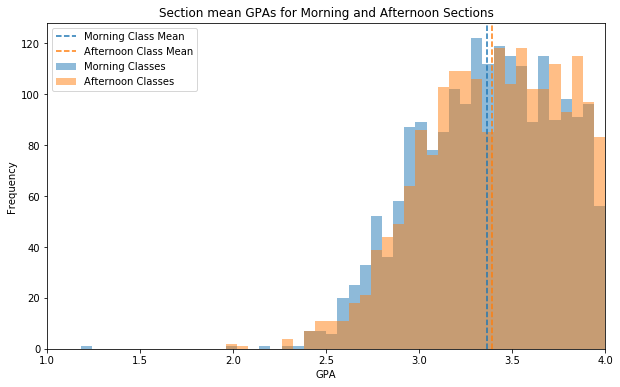

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(morning_choice, alpha=0.5, color='#1f77b4', bins=50, range=(1.0, 4.0), label='Morning Classes')
ax.axvline(morning_choice.mean(), alpha=1, color='#1f77b4', linestyle='dashed', label='Morning Class Mean')
ax.hist(afternoon_choice, alpha=0.5, bins=50, color='#ff7f0e', range=(1.0, 4.0), label='Afternoon Classes')
ax.axvline(afternoon_choice.mean(), alpha=1, color='#ff7f0e', linestyle='dashed', label='Afternoon Class Mean')
ax.legend()
ax.set_title('Section mean GPAs for Morning and Afternoon Sections')
ax.set_xlim(1,4);
ax.set_ylabel('Frequency')
ax.set_xlabel('GPA');

## Perform statistical testing for the hypothesis

In [9]:
stats.ttest_ind(morning_choice, afternoon_choice, equal_var=False)

Ttest_indResult(statistic=0.5200222457241197, pvalue=0.6030768978821697)

This shows that there is not a statistically significant difference between the morning and afternoon class GPAs.

Thus, we fail to reject the null hypothesis that grades are the same between the morning and afternoon.